<a href="https://colab.research.google.com/github/yslikitha/CreditCardFraud/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing all Necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


2. Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Navigate to data directory
import os
os.chdir('/content/drive/My Drive/GFGCreditcard')
dataset_path = '/content/drive/My Drive/GFGCreditcard/creditcard.csv'
data = pd.read_csv(dataset_path)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


3. Exploratory Data Analysis

In [ ]:
# Print the shape of the data
print(data.shape)
print(data.describe())


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print('details of valid transaction')
valid.Amount.describe()


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### From the above inferences we can clearly see that average transactions for fraudulent ones is more than valid transactions.This makes the problem interesting

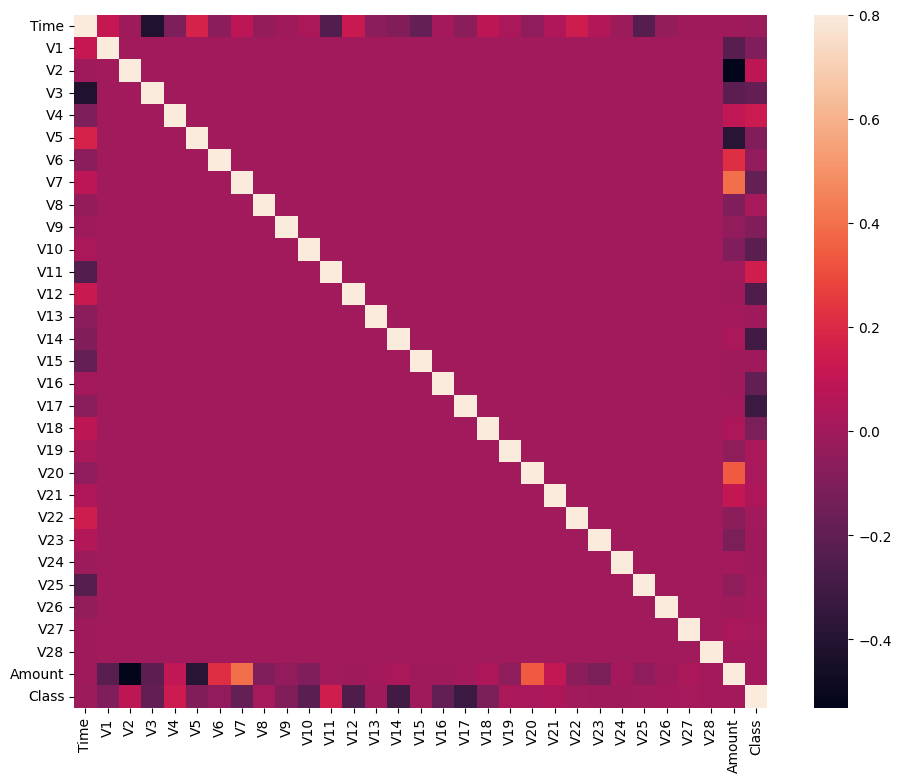

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


4. Model Development

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(284807, 30)
(284807,)


In [ ]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(xTrain, yTrain)

# Make predictions
yPred = logistic_regression.predict(xTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
classification_rep = classification_report(yTest, yPred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.9988939995084443
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.49      0.60        98

    accuracy                           1.00     56962
   macro avg       0.89      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(xTrain, yTrain)

# Make predictions
yPred = decision_tree.predict(xTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
classification_rep = classification_report(yTest, yPred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.9990519995786665
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(xTrain, yTrain)

# Make predictions
yPred = random_forest.predict(xTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
classification_rep = classification_report(yTest, yPred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.9995611109160493
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(xTrain, yTrain)

# Make predictions
yPred = svm_model.predict(xTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
classification_rep = classification_report(yTest, yPred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.9984551104244935
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.60      0.30      0.40        98

    accuracy                           1.00     56962
   macro avg       0.80      0.65      0.70     56962
weighted avg       1.00      1.00      1.00     56962



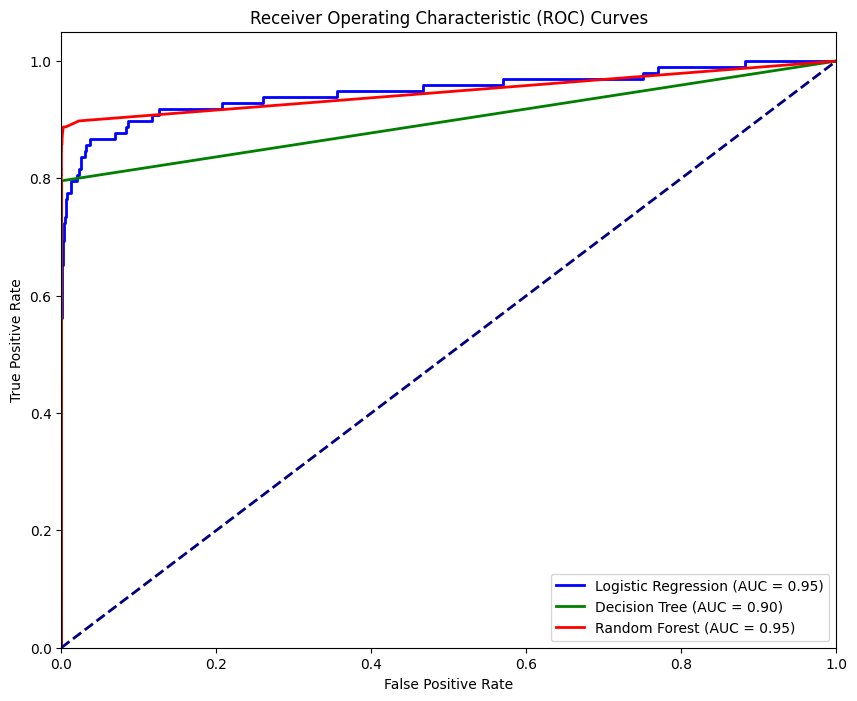

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make predictions for each model
yPred_log_reg = logistic_regression.predict_proba(xTest)[:, 1]
yPred_dec_tree = decision_tree.predict_proba(xTest)[:, 1]
yPred_rand_forest = random_forest.predict_proba(xTest)[:, 1]


# Calculate ROC curve and AUC for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(yTest, yPred_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_dec_tree, tpr_dec_tree, _ = roc_curve(yTest, yPred_dec_tree)
roc_auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

fpr_rand_forest, tpr_rand_forest, _ = roc_curve(yTest, yPred_rand_forest)
roc_auc_rand_forest = auc(fpr_rand_forest, tpr_rand_forest)


# Plotting the AUC-ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_dec_tree, tpr_dec_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dec_tree)
plt.plot(fpr_rand_forest, tpr_rand_forest, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rand_forest)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
xTrain_res, yTrain_res = smote.fit_resample(xTrain, yTrain)

In [ ]:
from collections import Counter

# Before SMOTE
print('Before SMOTE:')
print(f'Class distribution in yTrain: {Counter(yTrain)}')

# After SMOTE
print('\nAfter SMOTE:')
print(f'Class distribution in yTrain_res: {Counter(yTrain_res)}')


Before SMOTE:
Class distribution in yTrain: Counter({0: 227451, 1: 394})

After SMOTE:
Class distribution in yTrain_res: Counter({0: 227451, 1: 227451})


In [ ]:
# Train the Logistic Regression model on the oversampled data
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(xTrain_res, yTrain_res)

# Make predictions on the test set
yPred = logistic_regression.predict(xTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
classification_rep = classification_report(yTest, yPred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9861486605105158
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.93      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.96      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Train the Decision Tree classifier on the oversampled data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(xTrain_res, yTrain_res)

# Make predictions on the test set
yPred = decision_tree.predict(xTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
classification_rep = classification_report(yTest, yPred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9978582212703205
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.74      0.54        98

    accuracy                           1.00     56962
   macro avg       0.71      0.87      0.77     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Train the Random Forest classifier on the oversampled data
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(xTrain_res, yTrain_res)

# Make predictions on the test set
yPred = random_forest.predict(xTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
classification_rep = classification_report(yTest, yPred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9995259997893332
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



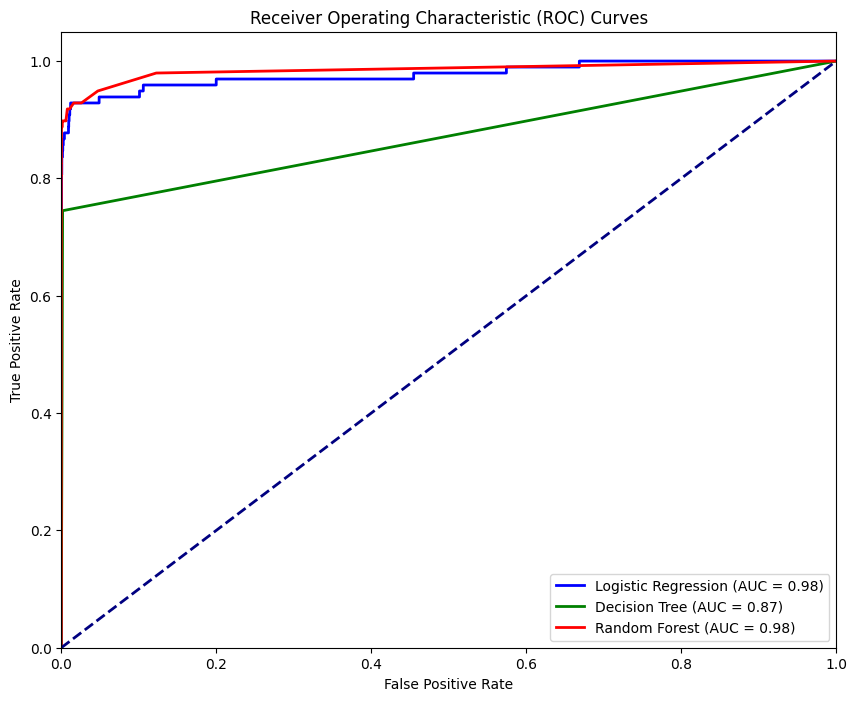

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make predictions for each model
yPred_log_reg = logistic_regression.predict_proba(xTest)[:, 1]
yPred_dec_tree = decision_tree.predict_proba(xTest)[:, 1]
yPred_rand_forest = random_forest.predict_proba(xTest)[:, 1]


# Calculate ROC curve and AUC for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(yTest, yPred_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_dec_tree, tpr_dec_tree, _ = roc_curve(yTest, yPred_dec_tree)
roc_auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

fpr_rand_forest, tpr_rand_forest, _ = roc_curve(yTest, yPred_rand_forest)
roc_auc_rand_forest = auc(fpr_rand_forest, tpr_rand_forest)


# Plotting the AUC-ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_dec_tree, tpr_dec_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dec_tree)
plt.plot(fpr_rand_forest, tpr_rand_forest, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rand_forest)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


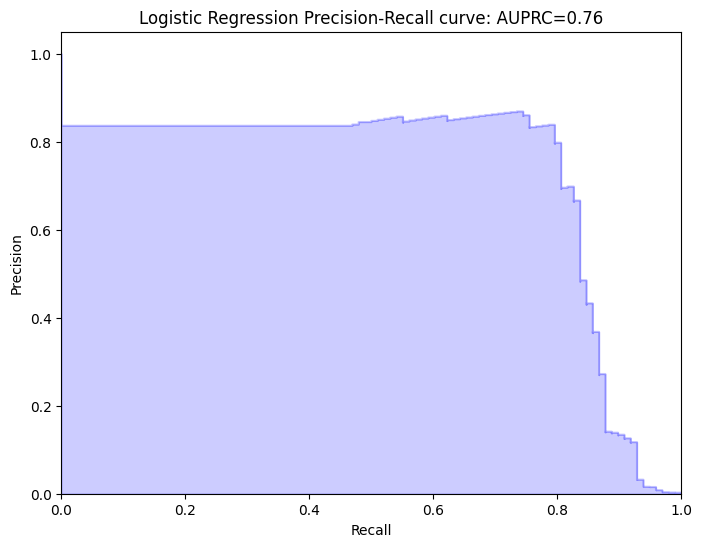

Logistic Regression AUPRC: 0.7615


In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming logistic_regression is your trained Logistic Regression model
# Replace xTest and yTest with your test data
# Replace logistic_regression.predict_proba(xTest)[:, 1] with your model's probability predictions

# Compute precision-recall curve and AUPRC for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(yTest, logistic_regression.predict_proba(xTest)[:, 1])
auprc_lr = auc(recall_lr, precision_lr)

# Plot the precision-recall curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.step(recall_lr, precision_lr, color='b', alpha=0.2, where='post')
plt.fill_between(recall_lr, precision_lr, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Logistic Regression Precision-Recall curve: AUPRC={auprc_lr:.2f}')
plt.show()

print(f'Logistic Regression AUPRC: {auprc_lr:.4f}')


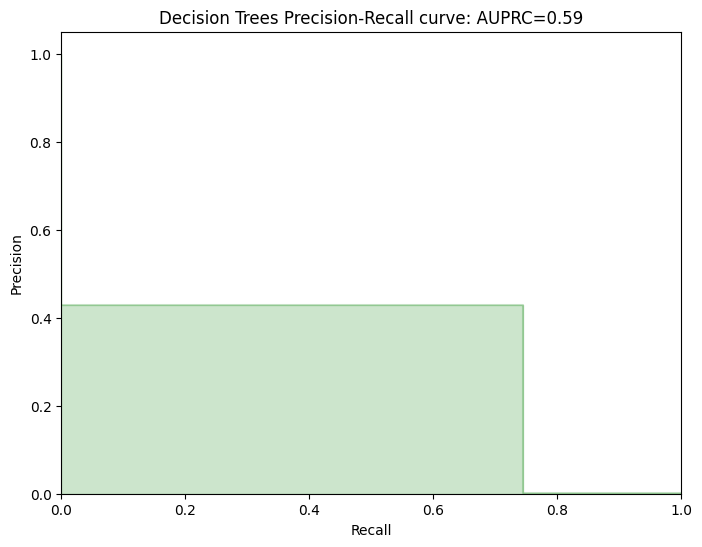

Decision Trees AUPRC: 0.5874


In [ ]:
# Assuming decision_tree is your trained Decision Tree model
# Compute precision-recall curve and AUPRC for Decision Trees
precision_dt, recall_dt, _ = precision_recall_curve(yTest, decision_tree.predict_proba(xTest)[:, 1])
auprc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve for Decision Trees
plt.figure(figsize=(8, 6))
plt.step(recall_dt, precision_dt, color='g', alpha=0.2, where='post')
plt.fill_between(recall_dt, precision_dt, step='post', alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Decision Trees Precision-Recall curve: AUPRC={auprc_dt:.2f}')
plt.show()

print(f'Decision Trees AUPRC: {auprc_dt:.4f}')


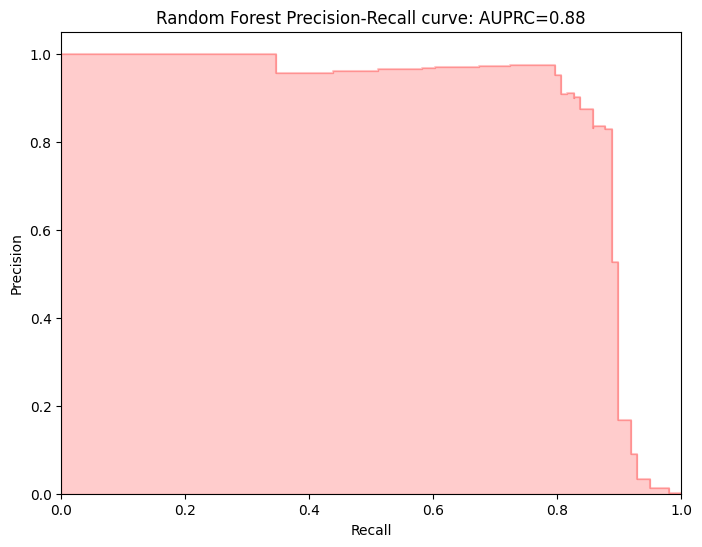

Random Forest AUPRC: 0.8753


In [ ]:
# Assuming random_forest is your trained Random Forest model
# Compute precision-recall curve and AUPRC for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(yTest, random_forest.predict_proba(xTest)[:, 1])
auprc_rf = auc(recall_rf, precision_rf)

# Plot the precision-recall curve for Random Forest
plt.figure(figsize=(8, 6))
plt.step(recall_rf, precision_rf, color='r', alpha=0.2, where='post')
plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Random Forest Precision-Recall curve: AUPRC={auprc_rf:.2f}')
plt.show()

print(f'Random Forest AUPRC: {auprc_rf:.4f}')
